c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[0 0 1 1 2 2] [2 1 3 2 5 2]
['red', 'red', 'blue', 'blue', 'green', 'green']
{0: '0: N. America (2)', 1: '1: S. America (1)', 2: '2: Europe (3)', 3: '3: Africa (2)', 4: '4: Asia (5)', 5: '5: Oceania (2)'}


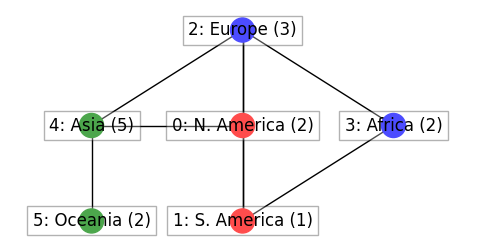

In [1]:
from utils.game import *
from utils.agent import *
from utils.world import *
from utils.viz import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

map_graph = np.array([
    [0, 1, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 1],
    [0, 0, 0, 0, 1, 0]
])
G = nx.from_numpy_array(map_graph)
pos = nx.spring_layout(G)

# Nb player
nb_player = 3

# Vector of presence on the map
# P[i, j] = #troops of player i in zone j
presence_map_start = np.array([
    [2, 1, 0, 0, 0, 0],
    [0, 0, 3, 2, 0, 0],
    [0, 0, 0, 0, 5, 2]
])

layout = {0: np.array([0.5, 0.5]),
           1: np.array([0.5, 0.3]),
           2: np.array([0.5, 0.7]),
           3: np.array([0.7, 0.5]),
           4: np.array([0.3, 0.5]),
           5: np.array([0.3, 0.3])
           }

countries = {0 : "N. America",
            1 : "S. America",
            2 : "Europe",
            3 : "Africa",
            4 : "Asia",
            5 : "Oceania"
            }

owner = np.argmax(presence_map_start, axis=0)
troops = np.max(presence_map_start, axis=0)

colors = {0: 'red', 1: 'blue', 2: 'green'}
colors = [colors[i] for i in owner]


labels = {i:f"{i}: {countries[i]} ({troops[i]})" for i in range(map_graph.shape[0])}

print(owner, troops)
print(colors)
print(labels)

plt.figure(figsize=(6,3))
plt.margins(x=0.2)
G = nx.from_numpy_array(map_graph)
label_options = {"ec": "k", "fc": "white", "alpha": 0.3}
nx.draw(G, layout, node_color=colors, labels=labels, bbox=label_options)
plt.show()

Run the game as if the NaiveAgent was playing

In [2]:
naive_agent = NaiveAgent()

# Start
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
print("Presence map:\n", game.world.presence_map)
print("Player 0 territories: ", game.world.get_territories(0))

player_presence_map = game.world.get_player_presence_map(p=0)
print("Player 0 presence map: ", player_presence_map)

# Reinforcements
to_deploy = game.world.get_reinforcements(p=0)
print("Reinforcements for player 0: ", to_deploy)

# Deployment
t = naive_agent.choose_deploy(to_deploy, player_presence_map)
print("Chosen territory: ", t)
game.world.deploy(p=0, t=t, n=to_deploy)
print("Presence map after deployment:\n", game.world.presence_map)

# Attack
player_presence_map = game.world.get_player_presence_map(p=0)
attacks = game.world.get_available_targets(p=0)
print("Possible attacks: ", attacks)
if len(attacks) > 0:
    chosen_attack = naive_agent.choose_attack(attacks, player_presence_map)
    player_attacked = game.world.get_owner(chosen_attack[1])
    print("Chosen attack: ", chosen_attack, " ; player attacked: ", player_attacked)
    game.resolve_battle(player1=0, player2=player_attacked,
                        t_orig=chosen_attack[0], t_dest=chosen_attack[1])
    print("Presence map after attack:\n", game.world.presence_map)

# Fortification
player_presence_map = game.world.get_player_presence_map(p=0)
available_fortifications = game.world.get_available_fortifications(p=0)
print("Available fortifications: ", available_fortifications)
if len(available_fortifications) > 0:
    chosen_fortification = naive_agent.choose_fortify(available_fortifications, player_presence_map)
    print("Chosen fortification: ", chosen_fortification)
    game.world.fortify(p=0, t_orig=0, t_dest=1)
    print("Presence map after fortification:\n", game.world.presence_map)


Presence map:
 [[2 1 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Player 0 territories:  [0, 1]
Player 0 presence map:  [ 2  1 -3 -2 -5 -2]
Reinforcements for player 0:  6
Chosen territory:  0
Presence map after deployment:
 [[8 1 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Possible attacks:  [(0, 2), (0, 4)]
Chosen attack:  (0, 2)  ; player attacked:  1
Presence map after attack:
 [[2 1 6 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 5 2]]
Available fortifications:  [(0, 1), (0, 2), (2, 0), (2, 1)]
Chosen fortification:  (0, 1)
Presence map after fortification:
 [[1 2 6 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 5 2]]


Test to run some turns with naive agents and save the maps

In [3]:
# Start
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
game.agents = [RandomAgent() for _ in range(nb_player)]

# Play some turns
game.run_and_save()

# Generate a gif and save it
generate_gif("./images/", "./gifs/", fps=0.5)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Try reinforce

In [4]:

class DeployNet(nn.Module):
    def __init__(self, nb_territories=6, hidden_size=16):
        super(DeployNet, self).__init__()

        self.input_fc = nn.Linear(nb_territories, hidden_size)
        #self.output_fc = nn.Linear(hidden_size+1, nb_territories)
        self.output_fc = nn.Linear(hidden_size, nb_territories)

    def forward(self, reinforcements, player_presence_map):

        # Find the possible actions (territories where the player has a presence)
        possible_actions = (player_presence_map > 0)

        # Apply a linear layer to the input
        x = F.tanh(self.input_fc(player_presence_map))

        # Concatenate the reinforcements to the output
        #x = torch.cat((x, reinforcements), dim=0)

        # Apply a linear layer to the output
        x = F.tanh(self.output_fc(x))
        
        # Mask the impossible actions
        x[~possible_actions] = -1000

        # Softmax the output
        actions_prob = F.softmax(x, dim=0)

        return actions_prob

class AttackFortifyNet(nn.Module):
    def __init__(self, nb_territories=6, hidden_size=16):
        super(AttackFortifyNet, self).__init__()

        self.input_fc = nn.Linear(nb_territories, hidden_size)
        self.torig_fc = nn.Linear(hidden_size, nb_territories)
        self.tdest_fc = nn.Linear(hidden_size, nb_territories)

    def forward(self, possible_actions, player_presence_map):

        # Apply a linear layer to the input
        x = F.tanh(self.input_fc(player_presence_map))

        # Split the output into two vectors (one for t_orig, one for t_dest)
        torig = F.tanh(self.torig_fc(x))
        tdest = F.tanh(self.tdest_fc(x))
        
        # Build a matrix of output with a dot product
        embedding_mat = torch.outer(torig, tdest)

        mask = torch.zeros_like(embedding_mat)
        for a in possible_actions:
            mask[a[0], a[1]] = 1

        # Put to zero all the positions that are not in possible_actions
        embedding_mat = torch.where(mask==1, embedding_mat, torch.zeros_like(embedding_mat)-1000)
            
        # Flatten the matrix
        embedding_mat = embedding_mat.flatten()

        # Softmax the output
        actions_prob = F.softmax(embedding_mat, dim=0)

        return actions_prob

class PolicyGradientAgent():
    def __init__(self, nb_territories=6,
                 learning_rate=0.01, gamma=0.99):

        self.nb_territories = nb_territories

        self.deploy_policy = DeployNet(nb_territories=nb_territories)
        self.attack_policy = AttackFortifyNet(nb_territories=nb_territories)
        self.fortify_policy = AttackFortifyNet(nb_territories=nb_territories)

        self.deploy_optimizer = torch.optim.Adam(self.deploy_policy.parameters(), lr=learning_rate)
        self.attack_optimizer = torch.optim.Adam(self.attack_policy.parameters(), lr=learning_rate)
        self.fortify_optimizer = torch.optim.Adam(self.fortify_policy.parameters(), lr=learning_rate)

        self.gamma = gamma

    def choose_deploy_prob(self, reinforcements, player_presence_map):
        """Returns the territories to deploy troops on"""

        # Output of the deploy policy
        deploy_log_prob = self.deploy_policy(reinforcements, player_presence_map)

        # Sample an action
        m = Categorical(deploy_log_prob)
        action = m.sample()

        return action.item(), m.log_prob(action)

    def choose_attack_prob(self, attacks, player_presence_map):
        """Returns the territory to attack"""

        # Output of the attack policy
        attack_log_prob = self.attack_policy(attacks, player_presence_map)

        # Sample an action
        m = Categorical(attack_log_prob)
        action = m.sample()

        # Decode the action into a territory pair
        t_orig = action // self.nb_territories
        t_dest = (action % self.nb_territories)

        return t_orig.item(), t_dest.item(), m.log_prob(action)

    def choose_fortify_prob(self, possible_fortifications, player_presence_map):
        """Returns the territory to fortify at the end of the turn"""

        # Output of the fortify policy
        fortify_log_prob = self.fortify_policy(possible_fortifications, player_presence_map)

        # Sample an action
        m = Categorical(fortify_log_prob)
        action = m.sample()

        # Decode the action into a territory pair
        t_orig = action // self.nb_territories
        t_dest = (action % self.nb_territories)

        return t_orig.item(), t_dest.item(), m.log_prob(action)

    def choose_deploy(self, reinforcements, player_presence_map):
        """The greedy version of choose_deploy_prob"""

        output = self.deploy_policy(reinforcements, player_presence_map)
        probs = F.softmax(output, dim=0).cpu()

        return torch.argmax(probs).item()

    def choose_attack(self, attacks, player_presence_map):
        """The greedy version of choose_attack_prob"""

        # Output of the attack policy
        attack_log_prob = self.attack_policy(attacks, player_presence_map)

        # Take the action with the highest probability
        action = torch.argmax(attack_log_prob)

        # Decode the action into a territory pair
        t_orig = action // self.nb_territories
        t_dest = (action % self.nb_territories)

        return t_orig.item(), t_dest.item()

    def choose_fortify(self, fortifications, player_presence_map):
        """The greedy version of choose_fortify_prob"""

        # Output of the fortify policy
        fortify_log_prob = self.fortify_policy(fortifications, player_presence_map)

        # Take the action with the highest probability
        action = torch.argmax(fortify_log_prob)

        # Decode the action into a territory pair
        t_orig = action // self.nb_territories
        t_dest = (action % self.nb_territories)

        return t_orig.item(), t_dest.item()


In [5]:
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
game.agents = [PolicyGradientAgent(), RandomAgent(), RandomAgent()]

test_agent = PolicyGradientAgent()

print("Presence map:\n", game.world.presence_map)
print("Player 0 territories: ", game.world.get_territories(0))

player_presence_map = torch.tensor(game.world.get_player_presence_map(p=0)).float()
print("Player 0 presence map: ", player_presence_map)

# Reinforcements
to_deploy = torch.tensor([game.world.get_reinforcements(p=0)])
print("Reinforcements for player 0: ", to_deploy)

# Deployment
t, prob = test_agent.choose_deploy_prob(to_deploy, player_presence_map)
print("Chosen territory: ", t, " ; prob: ", prob)
game.world.deploy(p=0, t=t, n=to_deploy)
print("Presence map after deployment:\n", game.world.presence_map)

# Attack
player_presence_map = torch.tensor(game.world.get_player_presence_map(p=0)).float()
attacks = game.world.get_available_targets(p=0)
print("Possible attacks: ", attacks)
if len(attacks) > 0:
    t_orig, t_dest, prob = test_agent.choose_attack_prob(attacks, player_presence_map)
    player_attacked = game.world.get_owner(t_dest)
    print("Chosen attack: ", t_orig, t_dest, " ; player attacked: ", player_attacked, " ; prob: ", prob)
    game.resolve_battle(player1=0, player2=player_attacked,
                        t_orig=t_orig, t_dest=t_dest)
    print("Presence map after attack:\n", game.world.presence_map)

# Fortification
player_presence_map = torch.tensor(game.world.get_player_presence_map(p=0)).float()
available_fortifications = game.world.get_available_fortifications(p=0)
print("Available fortifications: ", available_fortifications)
if len(available_fortifications) > 0:
    t_orig, t_dest, prob = test_agent.choose_fortify_prob(available_fortifications, player_presence_map)
    print("Chosen fortification: ", t_orig, t_dest, " ; prob: ", prob)
    game.world.fortify(p=0, t_orig=t_orig, t_dest=t_dest)
    print("Presence map after fortification:\n", game.world.presence_map)


Presence map:
 [[2 1 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Player 0 territories:  [0, 1]
Player 0 presence map:  tensor([ 2.,  1., -3., -2., -5., -2.])
Reinforcements for player 0:  tensor([6])
Chosen territory:  0  ; prob:  tensor(-1.5972, grad_fn=<SqueezeBackward1>)
Presence map after deployment:
 [[8 1 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Possible attacks:  [(0, 2), (0, 4)]
Chosen attack:  0 4  ; player attacked:  2  ; prob:  tensor(-0.6183, grad_fn=<SqueezeBackward1>)
Presence map after attack:
 [[2 1 0 0 6 0]
 [0 0 3 2 0 0]
 [0 0 0 0 0 2]]
Available fortifications:  [(0, 1), (0, 4), (4, 0)]
Chosen fortification:  0 1  ; prob:  tensor(-1.3574, grad_fn=<SqueezeBackward1>)
Presence map after fortification:
 [[1 2 0 0 6 0]
 [0 0 3 2 0 0]
 [0 0 0 0 0 2]]


c:\Users\Louis\anaconda3\envs\RL\lib\site-packages\torch\nn\functional.py:1956: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [7]:
game = Game(map_graph=map_graph, presence_map=presence_map_start, nb_players=nb_player)
game.agents = [PolicyGradientAgent(), RandomAgent(), RandomAgent()]

print("Presence map:\n", game.world.presence_map)
for j in range(5):
    for i in range(3):
        print("Player ", i, " territories: ", len(game.world.get_territories(i)))
        if len(game.world.get_territories(i)) > 0:
            if i == 0:
                player_presence_map = torch.tensor(game.world.get_player_presence_map(p=i)).float()
                print("Player 0 presence map: ", player_presence_map)

                # Reinforcements
                to_deploy = torch.tensor([game.world.get_reinforcements(p=i)])
                print("Reinforcements for player 0: ", to_deploy)

                # Deployment
                t, prob = game.agents[i].choose_deploy_prob(to_deploy, player_presence_map)
                print("Chosen territory: ", t, " ; prob: ", prob)
                game.world.deploy(p=i, t=t, n=to_deploy)
                print("Presence map after deployment:\n", game.world.presence_map)

                # Attack
                player_presence_map = torch.tensor(game.world.get_player_presence_map(p=i)).float()
                attacks = game.world.get_available_targets(p=0)
                print("Possible attacks: ", attacks)
                if len(attacks) > 0:
                    t_orig, t_dest, prob = game.agents[i].choose_attack_prob(attacks, player_presence_map)
                    player_attacked = game.world.get_owner(t_dest)
                    print("Chosen attack: ", t_orig, t_dest, " ; player attacked: ", player_attacked, " ; prob: ", prob)
                    game.resolve_battle(player1=i, player2=player_attacked,
                                        t_orig=t_orig, t_dest=t_dest)
                    print("Presence map after attack:\n", game.world.presence_map)

                # Fortification
                player_presence_map = torch.tensor(game.world.get_player_presence_map(p=0)).float()
                available_fortifications = game.world.get_available_fortifications(p=0)
                print("Available fortifications: ", available_fortifications)
                if len(available_fortifications) > 0:
                    t_orig, t_dest, prob = game.agents[i].choose_fortify_prob(available_fortifications, player_presence_map)
                    print("Chosen fortification: ", t_orig, t_dest, " ; prob: ", prob)
                    game.world.fortify(p=i, t_orig=t_orig, t_dest=t_dest)
                    print("Presence map after fortification:\n", game.world.presence_map)
            
            else:
                print("Player ", i)        
                print(f"Player {i} territories: ", game.world.get_territories(i))

                player_presence_map = torch.tensor(game.world.get_player_presence_map(p=i)).float()
                print(f"Player {i} presence map: ", player_presence_map)

                # Reinforcements
                to_deploy = torch.tensor([game.world.get_reinforcements(p=i)])
                print(f"Reinforcements for player {i}: ", to_deploy)

                # Deployment
                t = game.agents[i].choose_deploy(to_deploy, player_presence_map)
                print("Chosen territory: ", t)
                game.world.deploy(p=i, t=t, n=to_deploy)
                print("Presence map after deployment:\n", game.world.presence_map)

                # Attack
                player_presence_map = torch.tensor(game.world.get_player_presence_map(p=i)).float()
                attacks = game.world.get_available_targets(p=i)
                print("Possible attacks: ", attacks)
                if len(attacks) > 0:
                    t_orig, t_dest = test_agent.choose_attack(attacks, player_presence_map)
                    player_attacked = game.world.get_owner(t_dest)
                    print("Chosen attack: ", t_orig, t_dest, " ; player attacked: ", player_attacked)
                    game.resolve_battle(player1=i, player2=player_attacked,
                                        t_orig=t_orig, t_dest=t_dest)
                    print("Presence map after attack:\n", game.world.presence_map)

                # Fortification
                player_presence_map = torch.tensor(game.world.get_player_presence_map(p=i)).float()
                available_fortifications = game.world.get_available_fortifications(p=i)
                print("Available fortifications: ", available_fortifications)
                if len(available_fortifications) > 0:
                    t_orig, t_dest = test_agent.choose_fortify(available_fortifications, player_presence_map)
                    print("Chosen fortification: ", t_orig, t_dest)
                    game.world.fortify(p=i, t_orig=t_orig, t_dest=t_dest)
                    print("Presence map after fortification:\n", game.world.presence_map)

        else:
            print("Player ", i, " has lost the game")

Presence map:
 [[2 1 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Player  0  territories:  2
Player 0 presence map:  tensor([ 2.,  1., -3., -2., -5., -2.])
Reinforcements for player 0:  tensor([6])
Chosen territory:  1  ; prob:  tensor(-0.5472, grad_fn=<SqueezeBackward1>)
Presence map after deployment:
 [[2 7 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Possible attacks:  [(0, 2), (1, 2), (0, 4)]
Chosen attack:  0 4  ; player attacked:  2  ; prob:  tensor(-0.9211, grad_fn=<SqueezeBackward1>)
Presence map after attack:
 [[1 7 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Available fortifications:  [(1, 0)]
Chosen fortification:  1 0  ; prob:  tensor(-1.1921e-07, grad_fn=<SqueezeBackward1>)
Presence map after fortification:
 [[7 1 0 0 0 0]
 [0 0 3 2 0 0]
 [0 0 0 0 5 2]]
Player  1  territories:  2
Player  1
Player 1 territories:  [2, 3]
Player 1 presence map:  tensor([-7., -1.,  3.,  2., -5., -2.])
Reinforcements for player 1:  tensor([6])
Chosen territory:  2
Presence map after deployment:
 [[7 1 0 0 0 